In [302]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [303]:
from scipy import stats, optimize, interpolate
country = 'Russian Federation'
year = 1949

    # Считываем информацию по мужчинам и женщинам
data_male = pd.read_excel('age_data.xls', sheet_name='m; 1950-2005, estimates', skiprows=range(0, 5))
data_male = data_male[data_male['Major area, region, country or area*'] == country]
data_male = data_male[data_male['Reference date (as of 1 July)'] > year]
data_male = data_male.rename(columns={'Reference date (as of 1 July)': 'year',
                                          'Male population by five-year age groups (thousands)': '0 - 4',
                                          'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19',
                                          'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29', 'Unnamed: 12': '30 - 34',
                                          'Unnamed: 13': '35 - 39', 'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49',
                                          'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59', 'Unnamed: 18': '60 - 64',
                                          'Unnamed: 19': '65 - 69', 'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79',
                                          'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89', 'Unnamed: 24': '90 - 94',
                                          'Unnamed: 25': '95 - 99', 'Unnamed: 26': '100+'})
data_male = data_male.reset_index().drop(
        columns={'index', 'Index', 'Variant', 'Major area, region, country or area*', 'Notes', 'Country code'}, axis=1)

data_female = pd.read_excel('age_data.xls', sheet_name='f; 1950-2005, estimates', skiprows=range(0, 5))
data_female = data_female[data_female['Major area, region, country or area*'] == country]
data_female = data_female[data_female['Reference date (as of 1 July)'] > year]
data_female = data_female.rename(columns={'Reference date (as of 1 July)': 'year',
                                              'Female population by five-year age groups (thousands)': '0 - 4',
                                              'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19',
                                              'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29',
                                              'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39',
                                              'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49',
                                              'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59',
                                              'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69',
                                              'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79',
                                              'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89',
                                              'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99',
                                              'Unnamed: 26': '100+'})
data_female = data_female.reset_index().drop(
        columns={'index', 'Index', 'Variant', 'Major area, region, country or area*', 'Notes', 'Country code'}, axis=1)

data_both = pd.read_excel('age_data.xls', sheet_name='both; 1950-2005, estimates', skiprows=range(0, 5))
data_both = data_both[data_both['Major area, region, country or area*'] == country]
data_both = data_both[data_both['Reference date (as of 1 July)'] > year]
data_both = data_both.rename(columns={'Reference date (as of 1 July)': 'year',
                                              'Total population by five-year age groups (thousands)': '0 - 4',
                                              'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19',
                                              'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29',
                                              'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39',
                                              'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49',
                                              'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59',
                                              'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69',
                                              'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79',
                                              'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89',
                                              'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99',
                                              'Unnamed: 26': '100+'})
data_both = data_both.reset_index().drop(
        columns={'index', 'Index', 'Variant', 'Major area, region, country or area*', 'Notes', 'Country code'}, axis=1)


b_2005_data = data_both[data_both['year'] == 2005]
b_2005_array = numpy.delete(b_2005_data.to_numpy()[0], 0)
b_2005_array = np.delete(b_2005_array, np.where(b_2005_array == '-'))

In [304]:
"Определение диапазонов данных"

'Определение диапазонов данных'

In [305]:
m_surv_arrays = []
f_surv_arrays = []
b_surv_arrays = []
fertile= [];
m_to_f = [10000,0];
def mean_confidence_interval(data, confidence=0.75):
    a = 1.0 * np.array(data)
    n = len(a)
    print(n)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for j in range(1, 21):
        b_surv_arrays.append([])
for i in range(1950, 2005,5):
    m_data = data_male[data_male['year'] == i]
    m_data_next = data_male[data_male['year'] == i+5]
    m_array = numpy.delete(m_data.to_numpy()[0], 0)
    m_array = np.delete(m_array, np.where(m_array == '-'))
    m_array_next = numpy.delete(m_data_next.to_numpy()[0], 0)
    m_array_next = np.delete(m_array_next, np.where(m_array_next == '-'))

    f_data = data_female[data_female['year'] == i]
    f_data_next = data_female[data_female['year'] == i+5]
    f_array = numpy.delete(f_data.to_numpy()[0], 0)
    f_array = np.delete(f_array, np.where(f_array == '-'))
    f_array_next = numpy.delete(f_data_next.to_numpy()[0], 0)
    f_array_next = np.delete(f_array_next, np.where(f_array_next == '-'))

    b_data = data_both[data_both['year'] == i]
    b_data_next = data_both[data_both['year'] == i+5]
    b_array = numpy.delete(b_data.to_numpy()[0], 0)
    b_array = np.delete(b_array, np.where(b_array == '-'))
    b_array_next = numpy.delete(b_data_next.to_numpy()[0], 0)
    b_array_next = np.delete(b_array_next, np.where(b_array_next == '-'))

    m_to_f_ratio = m_array[0]/f_array[0];
    if m_to_f_ratio < m_to_f[0]:
        m_to_f[0] = m_to_f_ratio
    if m_to_f_ratio > m_to_f[1]:
        m_to_f[1] = m_to_f_ratio

    fertile.append((m_array[0]+f_array[0])/ sum(f_array[3:8]))

    for j in range(1, len(b_array)):
        b_surv_arrays[j-1].append(b_array_next[j] / b_array[j - 1])

for j in range(0, len(b_surv_arrays)):
    min = np.min(b_surv_arrays[j]);
    max = np.max(b_surv_arrays[j])
    if(max > 1):
        max = 1;
    b_surv_arrays[j] = [min,max]

print("Диапазоны выживаемости для разных вовзрастных групп:")
print((b_surv_arrays))


print("Диапазоны фертильности")
print(mean_confidence_interval(fertile))
fertile = [mean_confidence_interval(fertile)[1],mean_confidence_interval(fertile)[2]]

print("Диапазоны соотношения мальчиков и девочек")
print(m_to_f)




Диапазоны выживаемости для разных вовзрастных групп:
[[0.9909473573589163, 1], [0.9835904202158369, 1], [0.9717840883541046, 1], [0.9853346740921167, 1], [0.9850467638348624, 1], [0.982363468524604, 1], [0.9097656326622655, 0.994629982239042], [0.9689875503113695, 0.9832924914254334], [0.9459564295632107, 0.9752368546934236], [0.9428792824193032, 0.9834024396428354], [0.9142449240597067, 0.9902526640147501], [0.8948711163621107, 0.9229969866729038], [0.8489857411798717, 0.8888900795616866], [0.7938758067594662, 0.844361100271321], [0.7168744484535599, 0.7604060232617493], [0.6180957489323292, 1], [0.49167621735794725, 0.49345073334404355], [0.35612622080487055, 0.3580265345397874], [0.2337912087912088, 0.23545479985244921], [0.13963112450825116, 0.16222777084200304]]
Диапазоны фертильности
11
(0.405573285860053, 0.37354368173027425, 0.4376028899898317)
11
11
Диапазоны соотношения мальчиков и девочек
[1.0325590968461564, 1.0662600679886989]


In [306]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import random, math


def Model(fertility_rate, m_f_ratio, b_survival_rate, base_data, years):
    data = base_data[base_data['year'] == 2005]
    data = numpy.delete(data.to_numpy()[0], 0)
    data = np.delete(data, np.where(data == '-'))
    for k in range(0,years,5):
        # print(data.sum())
        for i in reversed(range(0, len(data)-1)):
            if i !=0:
                data[i] = data[i-1] * b_survival_rate[i - 1]
            else:
                data[i] = fertility_rate * sum(data[3:8])/(1 + m_f_ratio)
    return data.sum()


def Evaluate(param_values,base_data,years):
    Y = []
    for params in param_values:
        fertility_rate = params[0]
        m_f_ratio = params[1]
        b_survival_rate = params[2:len(params)]
        res = Model(fertility_rate, m_f_ratio, b_survival_rate,base_data,years)
        Y.append(res)
    return np.array(Y)


# Define the model inputs
names = ["fertile","m_to_f"]

for i in (range(0,99,5)):
    names.append('b_survival_rate_' + str(i) + "-" + str(i+5))


bounds = [fertile,m_to_f]
for i in b_surv_arrays:
    bounds.append(i)


problem = {
    'num_vars': len(names),
    'names': names,
    'bounds': bounds
}

# Generate samples
results = []
years = [10, 20, 50, 100]
# years = [10]
for i in years:
    print(i)
    param_values = saltelli.sample(problem, 1000)
    Y = Evaluate(param_values, data_both, i)
    print(Y)
    Si = sobol.analyze(problem, Y, print_to_console=False)
#     print(Si)
    results.append(Si)
# Print the first-order sensitivity indices

print("__________________")
# Значимость фертильности в зависимости от периода


10
[141592.65544371 143915.40199056 141452.46849421 ... 145925.16219072
 145925.03328032 145925.03328032]
20
[135451.63391875 139968.9754265  135180.72165259 ... 143610.41368818
 143610.15865787 143610.15865787]
50
[113945.55464294 129337.29794958 113065.42458248 ... 131610.79704957
 131610.47769292 131610.47769292]
100
[ 91579.98423185 130351.52944088  89574.36466585 ... 126283.15769169
 126282.89896887 126282.89896887]
__________________


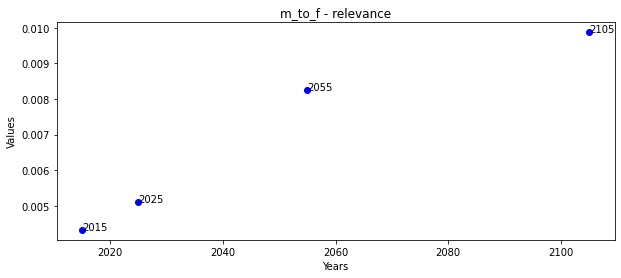

[0.0004146333004944118, 0.00047669957508445117, 0.0007828381843854654, 0.0008652857436115972]
----
[0.03171123907173404, 0.0344917618835664, 0.06306783681344809, 0.06483948189583795]
----
[0.0006144627005875751, 0.00030201451405282475, 5.9275289353708966e-05, 5.650589107809096e-06]
----
[0.0014205756608859897, 0.0013304525908306051, 0.00032046499641486675, 4.4145086944209405e-05]
----
[0.001038885949870864, 0.001847953933755103, 0.002919712178773568, 0.0029340355362508343]
----


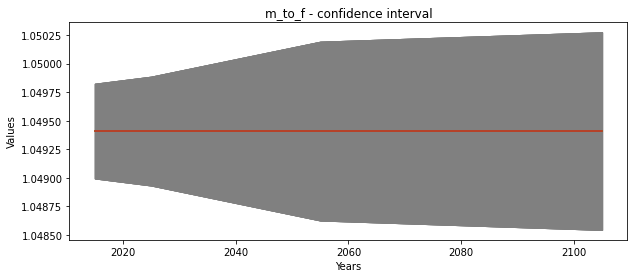

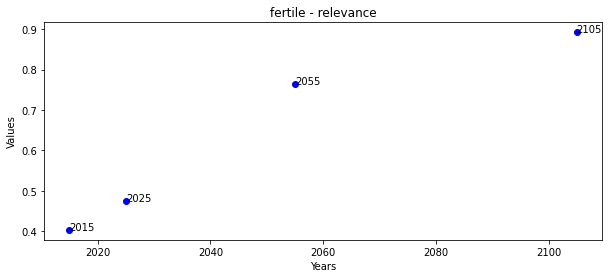

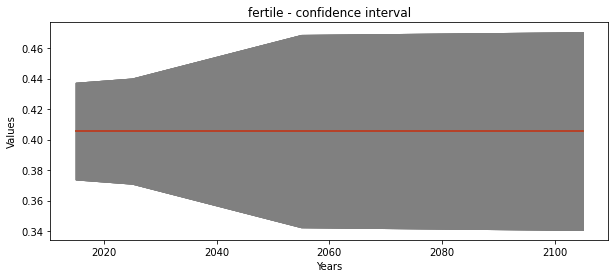

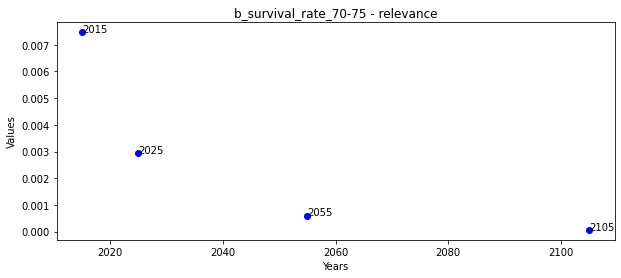

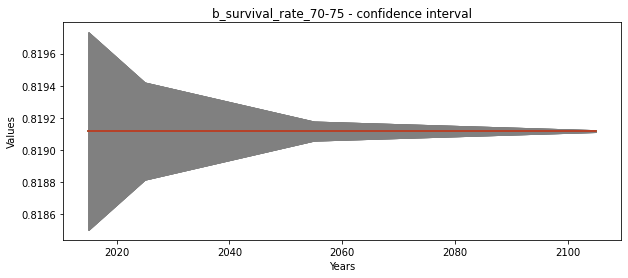

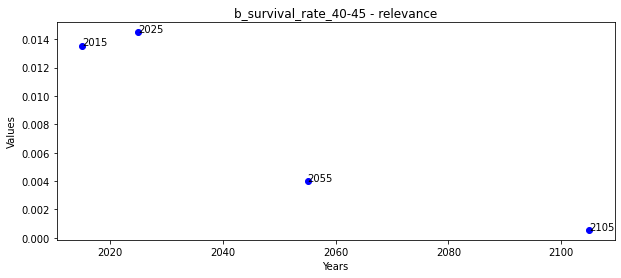

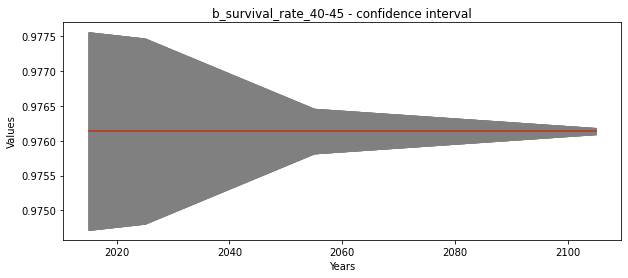

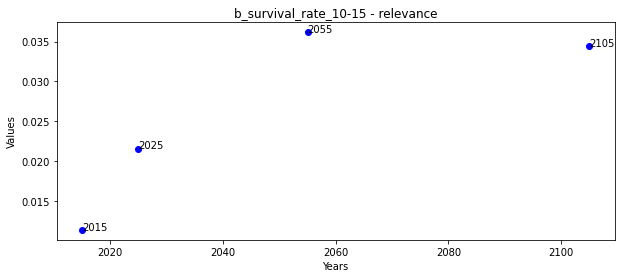

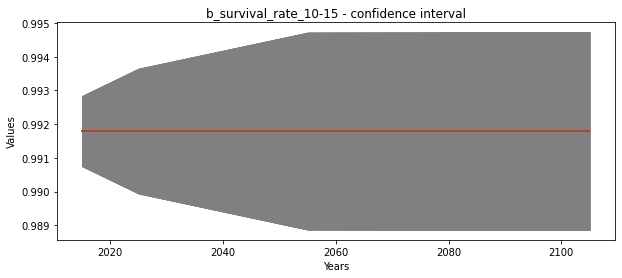

In [307]:
def get_sorted_by_value_coefficients(index,field ='ST'):
    res_ST = {}
    for i in range(len(names)):
        res_ST[names[i]] = results[index][field][i]
#         print(res_ST[names[i]])
    return sorted(res_ST.items(), reverse=True)
labels = ['fertile','m_to_f','b_survival_rate_10-15','b_survival_rate_40-45','b_survival_rate_70-75']
def get_conf_value(name):
    if name ==labels[0]:
        return (fertile[0]+fertile[1])/2
    if name ==labels[1]:
        return (m_to_f[0]+m_to_f[1])/2
    if name ==labels[2]:
        return (bounds[3][0]+bounds[3][1])/2
    if name ==labels[3]:
        return (bounds[9][0]+bounds[9][1])/2
    if name ==labels[4]:
        return (bounds[15][0]+bounds[15][1])/2

periods = [2015, 2025, 2055, 2105]
res_2015_ST_sorted = get_sorted_by_value_coefficients(0)
res_2025_ST_sorted = get_sorted_by_value_coefficients(1)
res_2055_ST_sorted = get_sorted_by_value_coefficients(2)
res_2105_ST_sorted = get_sorted_by_value_coefficients(3)

res_2015_ST_CONF_sorted = get_sorted_by_value_coefficients(0,'ST_conf')
res_2025_ST_CONF_sorted = get_sorted_by_value_coefficients(1,'ST_conf')
res_2055_ST_CONF_sorted = get_sorted_by_value_coefficients(2,'ST_conf')
res_2105_ST_CONF_sorted = get_sorted_by_value_coefficients(3,'ST_conf')




for yy in range(len(names)):
    # Значимость параметра в зависимости от периода
    if dict(zip(labels,range(len(labels)))).get(res_2015_ST_sorted[yy][0]) is None:
        continue
    fig = plt.figure(figsize=(10, 4))
    points = [[2015, res_2015_ST_sorted[yy][1]], \
              [2025, res_2025_ST_sorted[yy][1]], \
              [2055, res_2055_ST_sorted[yy][1]], \
              [2105, res_2105_ST_sorted[yy][1]]]
    for i in range(len(points)):
        x, y = points[i]
        plt.plot(x, y, 'bo')
        plt.text(x, y, x)
    plt.title('{} - relevance'.format(res_2015_ST_sorted[yy][0]))
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.show()


    ## Доверительный интервал
    error = [res_2015_ST_CONF_sorted[yy][1], \
               res_2025_ST_CONF_sorted[yy][1], \
               res_2055_ST_CONF_sorted[yy][1], \
               res_2105_ST_CONF_sorted[yy][1]]

    print(error)
    print("----")
    points = {}
    conf_values = dict(zip(labels,range(len(labels)))).get(res_2015_ST_sorted[yy][0])
    for i in range(len(periods)):
        x = periods[i]
        y = get_conf_value(res_2015_ST_sorted[yy][0])
        points[x] = y
    lists = points.items()
    x, y = zip(*lists)
    plt.figure(figsize=(10, 4))
    for i in range(len(x)):
        plt.plot(x, y)
        plt.fill_between(x, y - np.array(error), y + np.array(error), color='grey')
    plt.title('{} - confidence interval'.format(res_2015_ST_sorted[yy][0]))
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.show()

